# Analysis
### My findings from the plotted data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
city = pd.read_csv('city_data.csv')
rides = pd.read_csv('ride_data.csv')
pyberdf=pd.merge(rides,city, how="outer")
pyberdf.head()




,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [3]:
#showing city data which contains total driver counts per city to calculate percentages later
city.head(5)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
#splitting into 3 dfs
Urban=pyberdf.loc[pyberdf["type"]=="Urban"] 
Suburban=pyberdf.loc[pyberdf["type"]=="Suburban"]
Rural=pyberdf.loc[pyberdf["type"]=="Rural"]



In [21]:
#calculating averages and counts per city type
Urban2=Urban.groupby(['city'])
urbanavgpercity=Urban2['fare'].mean()
urbanridespercity=Urban2['ride_id'].count()
urbantotalpercity=Urban2['fare'].sum()

totalurbanfares=urbantotalpercity.sum()
totalurbanrides=urbanridespercity.sum()


Suburb=Suburban.groupby(['city'])
suburbanavgpercity=Suburb['fare'].mean()
suburbanridespercity=Suburb['ride_id'].count()
suburbantotalpercity=Suburb['fare'].sum()

totalsuburbanfares=suburbantotalpercity.sum()
totalsuburbanrides=suburbanridespercity.sum()

Rural2=Rural.groupby(['city'])
ruralavgpercity=Rural2['fare'].mean()
ruralridespercity=Rural2['ride_id'].count()
ruraltotalpercity=Rural2['fare'].sum()

totalruralfares=ruraltotalpercity.sum()
totalruralrides=ruralridespercity.sum()

urbandrivers1 = Urban.drop_duplicates(subset=["city","driver_count"], keep='first')
suburbandrivers1 = Suburban.drop_duplicates(subset=["city","driver_count"], keep='first')
ruraldrivers1 = Rural.drop_duplicates(subset=["city","driver_count"], keep='first')
urbandriverspercity = urbandrivers1.groupby("city")["driver_count"].sum()
suburbandriverspercity = suburbandrivers1.groupby("city")["driver_count"].sum()
ruraldriverspercity = ruraldrivers1.groupby("city")["driver_count"].sum()

#Totals
totaldrivers = city["driver_count"].sum()
totalfares= pyberdf["fare"].sum()
totalrides= pyberdf["ride_id"].count()

urbandrivers2 = city.loc[city["type"] =="Urban"]
suburbandrivers2 = city.loc[city["type"] =="Suburban"]
ruraldrivers2 = city.loc[city["type"] =="Rural"]
urbandrivertotal=urbandrivers2["driver_count"].sum()
suburbandrivertotal=suburbandrivers2["driver_count"].sum()
ruraldrivertotal=ruraldrivers2["driver_count"].sum()



20335.69

In [6]:
#dataframes for each type
Urbandf=pd.DataFrame({"Average Fare": urbanavgpercity,
                     "Total Rides": urbanridespercity,
                     "Total Drivers": urbandriverspercity},
                    columns=["Average Fare","Total Rides","Total Drivers"])


Suburbandf=pd.DataFrame({"Average Fare": suburbanavgpercity,
                     "Total Rides": suburbanridespercity,
                     "Total Drivers": suburbandriverspercity},
                    columns=["Average Fare","Total Rides","Total Drivers"])

                                       
Ruraldf=pd.DataFrame({"Average Fare": ruralavgpercity,
                     "Total Rides": ruralridespercity,
                     "Total Drivers": ruraldriverspercity},
                    columns=["Average Fare","Total Rides","Total Drivers"])

                                       
Urbandf["City Type"] = "Urban"
Suburbandf["City Type"] = "Suburban"
Ruraldf["City Type"] = "Rural"

totaldf=Urbandf
totaldf=totaldf.append(Suburbandf)
totaldf=totaldf.append(Ruraldf)
totaldf.head()

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Alvarezhaven,23.928710,31,21,Urban
Alyssaberg,20.609615,26,67,Urban
Antoniomouth,23.625000,22,21,Urban
Aprilchester,21.981579,19,49,Urban
Arnoldview,25.106452,31,41,Urban


In [7]:
Urbandf.head(5)

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Alvarezhaven,23.928710,31,21,Urban
Alyssaberg,20.609615,26,67,Urban
Antoniomouth,23.625000,22,21,Urban
Aprilchester,21.981579,19,49,Urban
Arnoldview,25.106452,31,41,Urban


In [18]:
Suburbandf.head(5)

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
Anitamouth,37.315556,9,16,Suburban
Campbellport,33.711333,15,26,Suburban
Carrollbury,36.606000,10,4,Suburban
Clarkstad,31.051667,12,21,Suburban
Conwaymouth,34.591818,11,18,Suburban


In [9]:
Ruraldf.head(5)

,Average Fare,Total Rides,Total Drivers,City Type
city,,,,
East Leslie,33.660909,11,9,Rural
East Stephen,39.053000,10,6,Rural
East Troybury,33.244286,7,3,Rural
Erikport,30.043750,8,3,Rural
Hernandezshire,32.002222,9,10,Rural


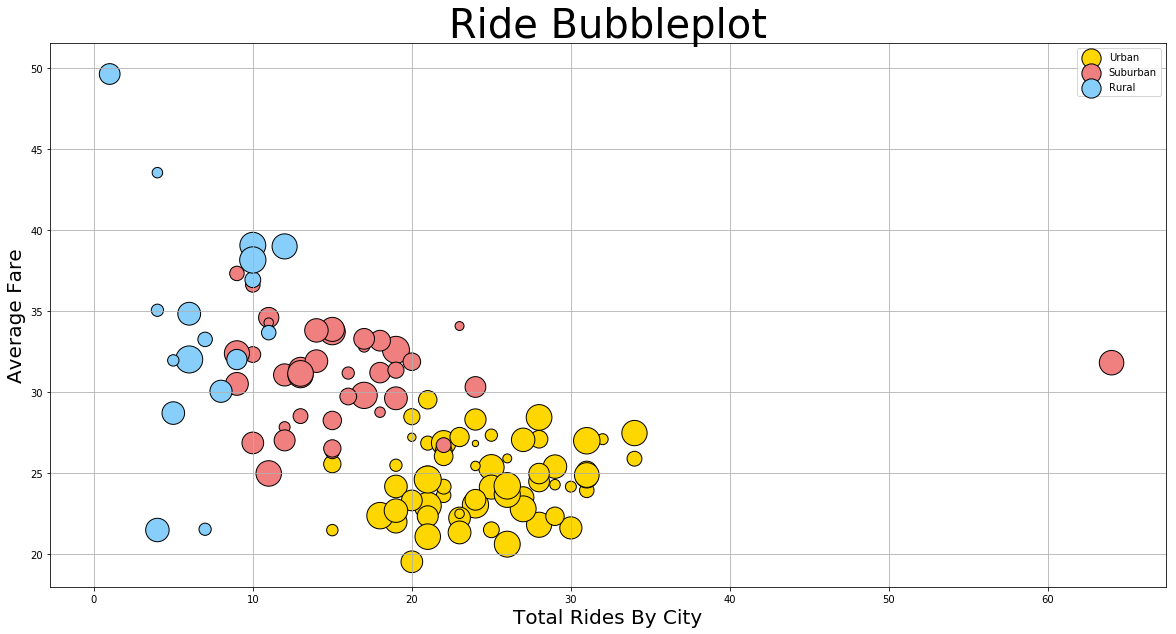

In [10]:
Bubbleplot = Urbandf.plot(kind='scatter', x="Total Rides", y="Average Fare", color= "gold", edgecolor="black",
                         grid=True, figsize=(20,10), s=totaldf["Total Drivers"]*10, legend=True, label="Urban")
Suburbandf.plot(kind='scatter', x="Total Rides", y="Average Fare", color= "lightcoral", edgecolor="black",
                         grid=True, figsize=(20,10), s=totaldf["Total Drivers"]*10, legend=True, label="Suburban", ax=Bubbleplot,)
Ruraldf.plot(kind='scatter', x="Total Rides", y="Average Fare", color= "lightskyblue", edgecolor="black",
                         grid=True, figsize=(20,10), s=totaldf["Total Drivers"]*10, legend=True, label="Rural",ax=Bubbleplot,)

plt.xlabel("Total Rides By City",fontsize=20)
plt.ylabel("Average Fare",fontsize=20)
plt.title("Ride Bubbleplot",fontsize=40)
plt.show()

In [11]:
urbanfarepercent=round((totalurbanfares/totalfares)*100)
suburbanfarepercent=round((totalsuburbanfares/totalfares)*100)
ruralfarepercent=round((totalruralfares/totalfares)*100)

urbanridepercent=round((totalurbanrides/totalrides)*100)
suburbanridepercent=round((totalsuburbanrides/totalrides)*100)
ruralridepercent=round((totalruralrides/totalrides)*100)

urbandriverpercent=round((urbandrivertotal/totaldrivers)*100)
suburbandriverpercent=round((suburbandrivertotal/totaldrivers)*100)
ruraldriverpercent=round((ruraldrivertotal/totaldrivers)*100)


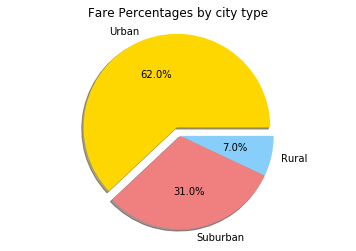

In [12]:
labels=["Urban","Suburban","Rural"]
sizes=[urbanfarepercent,suburbanfarepercent,ruralfarepercent]
colors=["gold","lightcoral","lightskyblue"]
explode=[0.1,0,0]
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True,autopct="%1.1f%%",)
plt.title("Fare Percentages by city type")
plt.axis("equal")
plt.show()

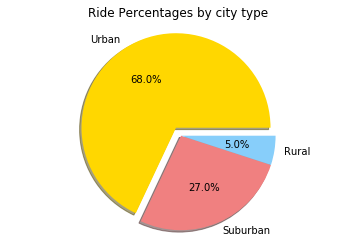

In [13]:
labels=["Urban","Suburban","Rural"]
sizes=[urbanridepercent,suburbanridepercent,ruralridepercent]
colors=["gold","lightcoral","lightskyblue"]
explode=[0.1,0,0]
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True,autopct="%1.1f%%",)
plt.title("Ride Percentages by city type")
plt.axis("equal")
plt.show()

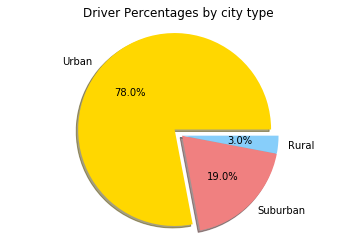

In [14]:
labels=["Urban","Suburban","Rural"]
sizes=[urbandriverpercent,suburbandriverpercent,ruraldriverpercent]
colors=["gold","lightcoral","lightskyblue"]
explode=[0.1,0,0]
plt.pie(sizes,labels=labels,colors=colors,explode=explode,shadow=True,autopct="%1.1f%%",)
plt.title("Driver Percentages by city type")
plt.axis("equal")
plt.show()
